<a name = "top"></a>
# Comparative Analysis of Video Game Sales
<b>by Mazen Asaad</b>

#### Contents
- [Introduction](#intro)
- [Data Cleaning](#clean)
- [Exploratory Data Analysis](#EDA)
- [Statistical Analysis of the Console Wars](#stats)
- [Conclusion](#conclusion)

<a name = "intro"></a>
<hr>

## Introduction
[back to top](#top)

The goal of this project is to walk through an example of some exploratory data analysis. The data we'll be using is a list of video games released over the past 30 years, along with regional sales numbers and review scores. Video games are a multi-billion dollar industry, and new games can sometimes take years and millions of dollars to develop. It is imperative that companies don't waste their resources on a poorly received game. Understanding historical as well as recent market trends can help mitigate this risk before it's too late.

We'll start by inspecting and cleaning the data. Then we'll do some exploratory visualization to get a sense of any interesting trends. Finally we'll use statistical analysis to look at how different video game companies have performed against each other in the past. The dataset we'll use is available here: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings.

<a name = "clean"></a>
<hr>

## Data Cleaning

[back to top](#top)

### Inspecting the data

First we need to load the data and make sure there are no problems with it. Then we should start inspecting the data by looking at it's <code>.info()</code> summary and a few sample rows.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [2]:
# Load in the data
sheet = pd.read_csv('dataset_game_sales.csv')

In [3]:
# Display the info and first few rows of data
sheet.info()

display(sheet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Now we can see more clearly what we're working with. Beyond the sales and review data, each game also has an entry for Platform, Year of Release, Genre, Publisher, Developer, and ESRB rating. Note that one game can be released on multiple platforms, which would be different entries in our DataFrame.

### Cleaning up name discrepancies

Looking at the counts from <code>.info()</code> above, we can see that 2 entries don't have names. That's not a field you'd expect to be missing, so let's take a closer look.

In [4]:
# Display rows with NaN names
display(sheet[sheet.Name.isnull()])

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


It's strange that they don't have names, but they do have associated sales data that seems legitimate, so we'll keep them in the analysis. We should also check whether there are any duplicate entries in our data that might skew the results. The same game can be released on multiple platforms, so to check for duplicates we should take both of these fields into account.

In [5]:
# Display the duplicate entries
display(sheet[sheet.duplicated(['Name','Platform'],keep=False)].sort_values(by='Name'))

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
604,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.22,0.00,0.23,2.56,83.0,22.0,5.5,101.0,EA Tiburon,E
16233,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.00,0.01,0.00,0.00,0.01,83.0,22.0,5.5,101.0,EA Tiburon,E
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.78,0.01,0.15,1.56,83.0,54.0,8.5,134.0,EA Canada,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.13,0.02,0.10,1.25,83.0,54.0,8.5,134.0,EA Canada,T
5973,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.04,0.29,82.0,19.0,8.5,525.0,Black Box,T
11716,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0.00,0.06,0.00,0.02,0.08,82.0,19.0,8.5,525.0,Black Box,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,Sega,0.41,0.06,0.04,0.66,1.16,43.0,17.0,4.1,176.0,Sonic Team,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48,43.0,17.0,4.1,176.0,Sonic Team,E10+
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


It looks like there are a few duplicate entries we need to address. It's difficult to say which of these are the accurate values, but there are only a few disparities relative to the total number of entries, so dropping them shouldn't bias the results.

In [6]:
# Drop the duplicate entries
data = sheet.drop(sheet[sheet.duplicated(['Name','Platform'],keep=False)].index).copy()

### Cleaning up review scores

Another anomaly is between the <code>User_Score</code> and <code>User_Count</code>. We'd expect both to have the same number of non-null entries, just like the <code>Critic_Score</code> and <code>Critic_Count</code>. This suggests some cleanup is needed on the <code>User_Score</code> data. Upon inspection, it looks like one entry, 'tbd', may be what's causing the discrepancy.

In [7]:
# Print list of unique User Score values
print(data.User_Score.unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [8]:
# Display the first few rows with 'tbd' User Scores
display(data[data.User_Score == 'tbd'].head())

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
119,Zumba Fitness,Wii,2010.0,Sports,505 Games,3.45,2.59,0.0,0.66,6.71,NaN,NaN,tbd,NaN,"Pipeworks Software, Inc.",E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,Namco Bandai Games,2.08,1.35,0.0,0.54,3.98,61.0,21.0,tbd,NaN,Digital Eclipse,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,Majesco Entertainment,1.51,1.03,0.0,0.27,2.81,NaN,NaN,tbd,NaN,"Majesco Games, Majesco",T
645,uDraw Studio,Wii,2010.0,Misc,THQ,1.65,0.57,0.0,0.20,2.42,71.0,9.0,tbd,NaN,THQ,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.0,0.07,2.39,73.0,4.0,tbd,NaN,Konami Computer Entertainment Hawaii,E


These entries seem normal otherwise, so let's keep them and replace 'tbd' with NaN to resolve the discrepancy. We should also change the <code>User_Score</code> type to float64 like the rest of the quantitative data.

In [9]:
# Replace the 'tbd' User Scores with NaN
data.User_Score.replace('tbd',np.nan,inplace=True)

# Change the type of the User Scores
data.User_Score = pd.to_numeric(data.User_Score,errors='coerce')

Another issue to note is that the <code>Critic_Score</code> values seem to be out of 100, whereas <code>User_Score</code> is out of 10. We'll scale up the <code>User_Score</code> by a factor of 10 to make them comparable.

In [10]:
# Scale the user scores up 10x to match the range of the critic score
data['User_Score'] = data['User_Score']*10

### Looking at the time span

Now let's take a look at the span of time that this data covers by plotting the number of games released each year.

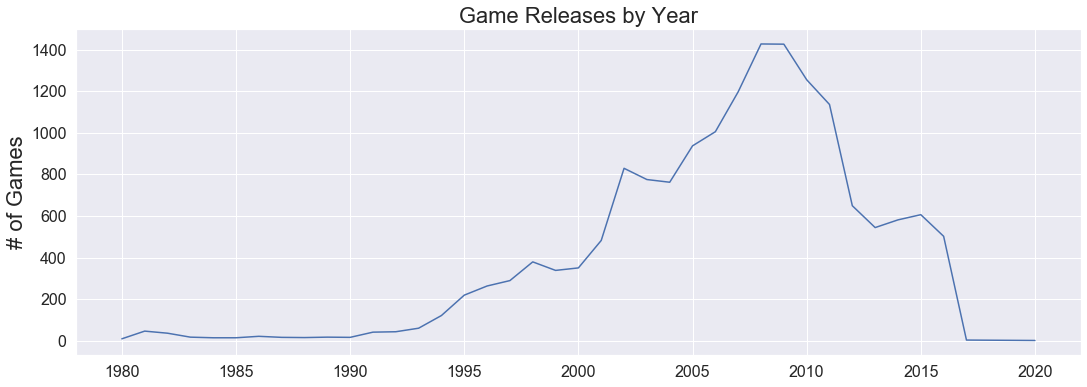

In [11]:
# Count how many games were released each year
games_by_year = data.groupby(by='Year_of_Release').count()
games_by_year = games_by_year.loc[:,['Name']]

# Plot the data & format the plot
games_by_year.plot(kind='line',legend=False,figsize=(18,6))
ax = plt.gca()
ax.set_title('Game Releases by Year',fontsize=22)
ax.set_xlabel('',fontsize=22)
ax.set_ylabel('# of Games',fontsize=22)
ax.tick_params(axis='both',which='major',labelsize=16)

It looks like there is a gradual increase in game releases until 2008 followed by a decline, possibly reflecting drops economic activity due to the Great Recession. But it's strange to have entries with release years up to 2020 as this data is only supposed to go up to December 2016. Let's take a closer look at these rows.

In [12]:
# Display the entries with release years after 2016
display(data[data.Year_of_Release > 2016])

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5936,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29,NaN,NaN,NaN,NaN,Ubisoft,E
14086,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN
16222,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16385,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


These entries could possibly be due to something like pre-orders, but for the purposes of this analysis we'll want to exclude them and focus only on games that were available at the time of this data collection.

While we're at it, let's take a look at some of the null entries for <code>Year_of_Release</code>.

In [13]:
# Display the first few entries with NaN for Year of Release
display(data[data.Year_of_Release.isnull()].head())

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
183,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,94.0,29.0,85.0,140.0,EA Tiburon,E
377,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,84.0,20.0,64.0,76.0,EA Canada,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.80,0.97,0.00,0.29,3.06,74.0,17.0,79.0,22.0,Traveller's Tales,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,NaN,NaN,NaN,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53,NaN,NaN,NaN,NaN,NaN,NaN


The other fields seem normal, so the NaN values are just due to missing data. One concern is that we won't have enough information to look at trends over time if this is a large percentage of our observations. Let's see how much of the data this impacts.

In [14]:
# Print out the percent of the data with NaN for Year of release
print('Missing: %.2f%%' % (100*data.Year_of_Release.isnull().sum()/len(data)))

Missing: 1.60%


Only 1.60% of the data has missing <code>Year_of_Release</code> values. We should have plenty of information to draw conclusions about trends over time. We'll keep them in mind in case they cause a problem later in the analysis. For now, we'll filter the data to only include entries where <code>Year_of_Release</code> is 2016 or earlier.

In [15]:
# Filter out data with a Year of Release after 2016
# Using fillna(0) during indexing enables us to keep the NaN rows instead of implicitly dropping them
data = data[data.Year_of_Release.fillna(0) <= 2016]

Now that all that is taken care of, let's dig into the data!

<a name = "EDA"></a>
<hr>

# Exploratory Data Analysis
[back to top](#top)

### How have games sold over the years?
For the exploratory analysis, we want to look for interesting trends in our key variables that might be worth analyzing further. There are a lot of different questions we can ask, but let's just pick a few big ones to focus on for now. To start with, let's plot the sales totals by region, grouped by the release year of the games they represent.

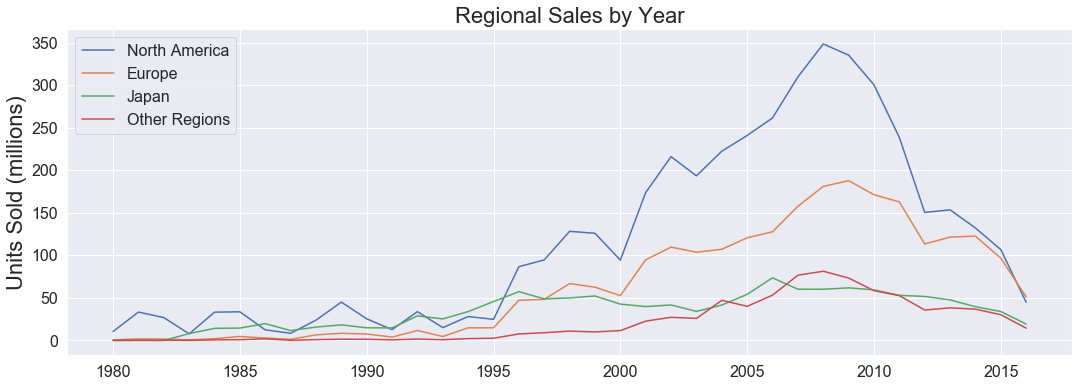

In [16]:
# Group the sales data by year
sales_by_year = data.groupby(by='Year_of_Release').sum()
sales_by_year = sales_by_year.loc[:,['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

# Plot the data & format the plot
sales_by_year.plot(kind='line',figsize=(18,6))
ax = plt.gca()
ax.legend(labels=['North America','Europe','Japan','Other Regions'],loc='upper left',prop={'size':16})
ax.set_title('Regional Sales by Year',fontsize=22)
ax.set_xlabel('',fontsize=22)
ax.set_ylabel('Units Sold (millions)',fontsize=22)
ax.tick_params(axis='both',which='major',labelsize=16)

Clearly most of the sales are in North America, followed by Europe, with Japan and Other Regions lagging far behind. This trend has been pretty consistent since the mid-90's when sales from those two groups started taking off. There also seems to be a drop in sales around 2008, consistent with the drop in releases we saw above.

### How well do different genres perform?

Our dataset includes the genre for each game. This enables us to see which genres are have done better across time or regions. A single game occupies multiple entries in our DataFrame if it was released on multiple platforms, but for looking at the genres we want to aggregate those results. Let's make a new DataFrame that merges these entries along with their relevant sales and review information. Then we'll start by plotting the number of games released in each genre.

(Side Note: The different hardware systems that games are released on are called platforms. There is also a genre of games called platform<i>ers</i>. In the DataFrame, this genre is simply called 'platform' as in 'platform games', but to avoid confusion I'll be referring to this group as 'platformers' from here on out.)

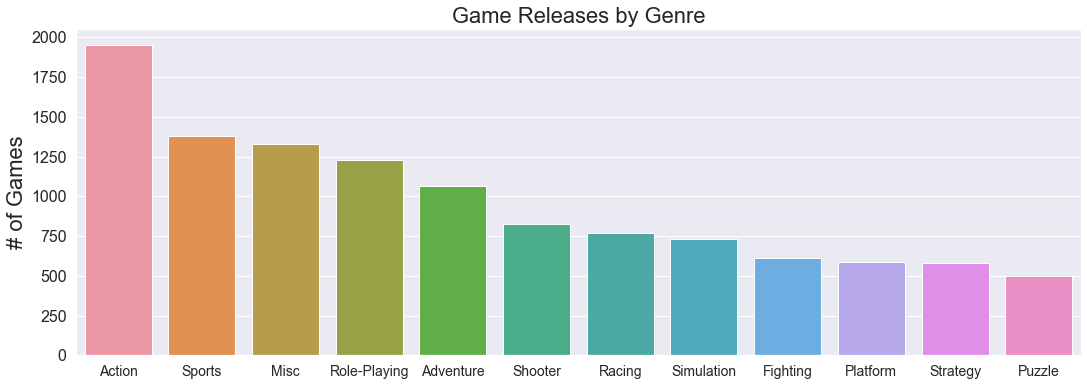

In [17]:
# Group the data by game, taking sums or means where appropriate
merged = data.copy()
merged = merged.groupby('Name').agg({'Year_of_Release':'first','Genre':'first','Publisher':'first','NA_Sales':'sum',
                                     'EU_Sales':'sum','JP_Sales':'sum','Other_Sales':'sum','Global_Sales':'sum',
                                     'Critic_Score':'mean','Critic_Count':'sum','User_Score':'mean','User_Count':'sum',
                                     'Developer':'first','Rating':'first'})

# Sort the bars by the total number of games in each category
genre_sort_idx = merged['Genre'].value_counts().index

# Plot the counts for each group and format the plot
fig = plt.figure(figsize=(18,6))
sns.countplot(x='Genre',data=merged,order=genre_sort_idx)
ax = plt.gca()
ax.set_title('Game Releases by Genre',fontsize=22)
ax.set_xlabel('',fontsize=22)
ax.set_ylabel('# of Games',fontsize=22)
ax.tick_params(axis='x',which='major',labelsize=14)
ax.tick_params(axis='y',which='major',labelsize=16)

It looks like action games have a strong lead with a gradual decline in size across the rest of the categories. Now that we can see how many games are in each category, let's look at how well those games sold.

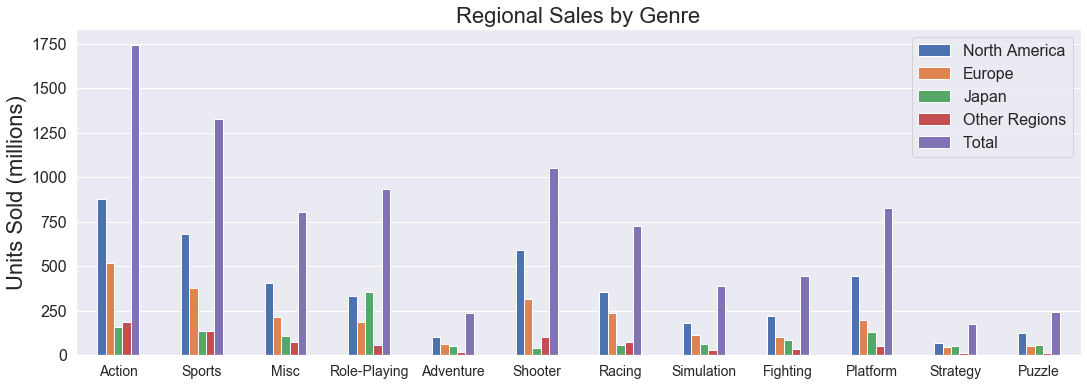

In [18]:
# List out the relevant columns and their labels
sales_list = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
sales_label = ['North America','Europe','Japan','Other Regions','Total']

# Get the totals grouped by genre
sales_by_genre = merged.groupby(by='Genre').sum()
sales_by_genre = sales_by_genre.reindex(genre_sort_idx)
sales_by_genre = sales_by_genre.loc[:,sales_list]

# Plot the data & format the plots
sales_by_genre.plot(kind='bar',figsize=(18,6))
ax = plt.gca()
ax.legend(labels=sales_label,loc='upper right',prop={'size':16})
ax.set_title('Regional Sales by Genre',fontsize=22)
ax.set_xlabel('',fontsize=22)
ax.set_ylabel('Units Sold (millions)',fontsize=22)
ax.tick_params(axis='x',which='major',labelsize=14,rotation=0)
ax.tick_params(axis='y',which='major',labelsize=16)
ax.grid(False,axis='x')

Already we're seeing some pretty interesting results. The first thing that jumps out is that the shooters and platformers tend to sell better than expected given the size of their category. Additionally, adventure games are the 2nd worst selling despite the fact that they're the 5th largest category.

We can also see that sales tend to be highest in North America, followed Europe and then Japan. One category that drastically counters this trend is role-playing games. But has that always been the case?

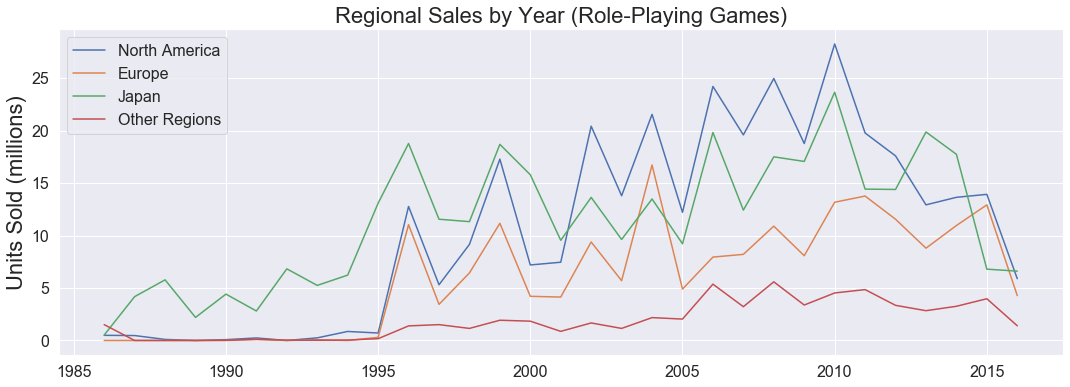

In [19]:
# Group the sales data by year, only for role-playing games
sales_by_year = data[data.Genre == 'Role-Playing'].groupby(by='Year_of_Release').sum()
sales_by_year = sales_by_year.loc[:,['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

# Plot the data & format the plot
sales_by_year.plot(kind='line',figsize=(18,6))
ax = plt.gca()
ax.legend(labels=['North America','Europe','Japan','Other Regions'],loc='upper left',prop={'size':16})
ax.set_title('Regional Sales by Year (Role-Playing Games)',fontsize=22)
ax.set_xlabel('',fontsize=22)
ax.set_ylabel('Units Sold (millions)',fontsize=22)
ax.tick_params(axis='both',which='major',labelsize=16)

Looking at the sales of role-playing games over time, it's clear that up until the late 90's the market was almost entirely in Japan. Then North American and European sales started to take off. The fact that the Japanese sales still outperformed Europe and almost matched North America is especially notable given their relatively small population. Clearly any developers making role-playing games should have the preferences of the Japanese market in mind.

It's also worth digging into why different genres might sell better or worse. Maybe shooters and platformers are just better games. What do the reviewers think?

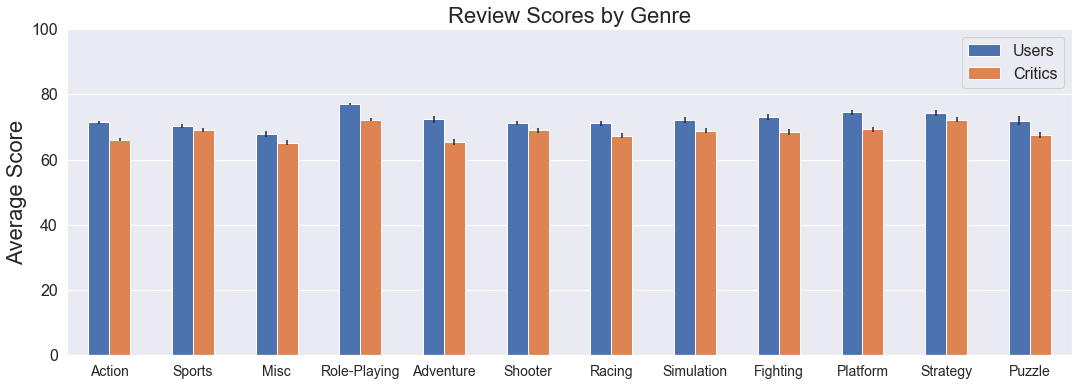

In [20]:
# Calculate the mean and standard error grouped by genre
scores_by_genre = merged.groupby(by='Genre').mean()
scores_by_genre = scores_by_genre.reindex(genre_sort_idx)
scores_by_genre = scores_by_genre.loc[:,['User_Score','Critic_Score']]
scores_by_genre_sem = merged.groupby(by='Genre').sem()
scores_by_genre_sem = scores_by_genre_sem.reindex(genre_sort_idx)
scores_by_genre_sem = scores_by_genre_sem.loc[:,['User_Score','Critic_Score']]

# Plot the data & format the plots
scores_by_genre.plot(kind='bar',yerr=scores_by_genre_sem,ylim=[0,100],figsize=(18,6))
ax = plt.gca()
ax.legend(labels=['Users','Critics'],loc='upper right',prop={'size':16})
ax.set_title('Review Scores by Genre',fontsize=22)
ax.set_xlabel('',fontsize=22)
ax.set_ylabel('Average Score',fontsize=22)
ax.tick_params(axis='x',which='major',labelsize=14,rotation=0)
ax.tick_params(axis='y',which='major',labelsize=16)
ax.grid(False,axis='x')

Actually, all genres have similar scores. Shooters and platformers aren't especially well liked, they just sell better. And reviewers don't seem particularly unhappy with adventure games, they just sell worse for some reason. One possibility is that there are simply too many adventure games for the market size. As their name implies, adventure games tend to take longer to complete than other games. The more time a player puts into a game, the less often he or she will need to buy a new one, driving down sales. If the adventure game market is relatively saturated, a developer might think twice before making a new game in that category.

### Why do some genres sell better?

Focusing now on the top performers, why do platformers and shooters sell so many copies? So far we've just looked at the total sales, but to get a better sense of what's going on we should look at the distribution as well. It might be that one or two games just sold so well that the numbers are inflated. Let's start by looking at how well each platformer sold, grouped by <code>Publisher</code>.

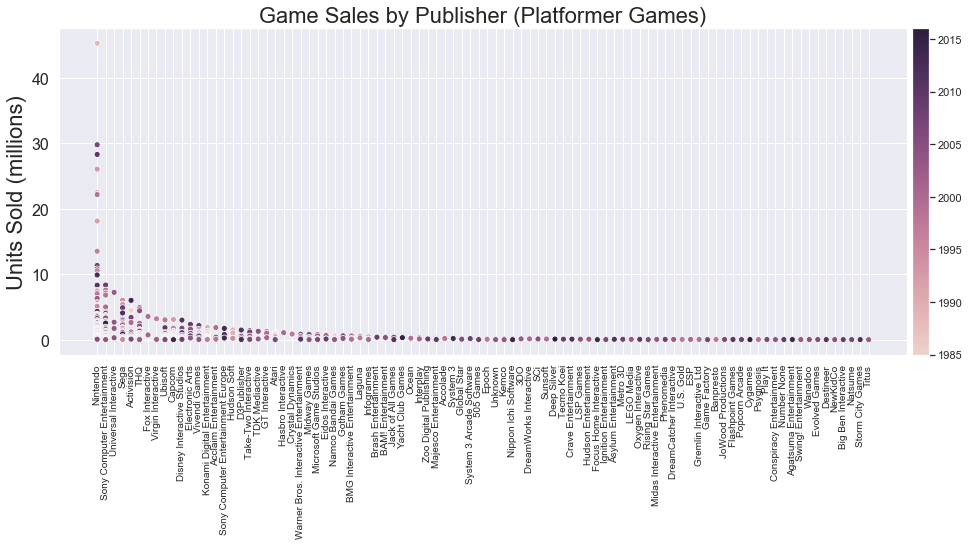

In [21]:
# Get the data for the platformers
Platformers = merged[merged.Genre == 'Platform'].loc[:,['Year_of_Release','Publisher','Global_Sales']]
Platformers = Platformers.sort_values(by='Global_Sales',ascending=False)

# Plot the data & format the plots
fig = plt.figure(figsize=(18,6))
sns.scatterplot(data=Platformers,x='Publisher',y='Global_Sales',hue='Year_of_Release')
ax = plt.gca()
ax.legend().set_visible(False)
ax.set_title('Game Sales by Publisher (Platformer Games)',fontsize=22)
ax.set_xlabel('',fontsize=22)
ax.set_ylabel('Units Sold (millions)',fontsize=22)
ax.tick_params(axis='x',which='major',labelsize=10,rotation=90)
ax.tick_params(axis='y',which='major',labelsize=16)

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=sns.cubehelix_palette(8,as_cmap=True), norm=plt.Normalize(1985,2016))
cbar = fig.colorbar(sm,pad=0.005)

Here we can see that the success of platformers is almost entirely due to Nintendo. No other company has individual sales over 10 million, and Nintendo has about a dozen games meeting that criterion. The darker points on the plot indicate games that were released more recently. We can see the popular Nintendo games are spread out across time, though one early game far outsold the rest.

In [22]:
# Display the platformers that sold over 40 million units
display(merged[(merged.Genre == 'Platform') & (merged.Global_Sales > 40)])

,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Name,,,,,,,,,,,,,,
Super Mario Bros.,1985.0,Platform,Nintendo,32.48,4.88,6.96,0.99,45.31,NaN,0.0,NaN,0.0,NaN,NaN


Unsurprisingly, it's the first Super Mario Bros. from the original NES and Gameboy (GB), back when Nintendo had much less competition. Let's see how platformers do without this one company boosting the genre.

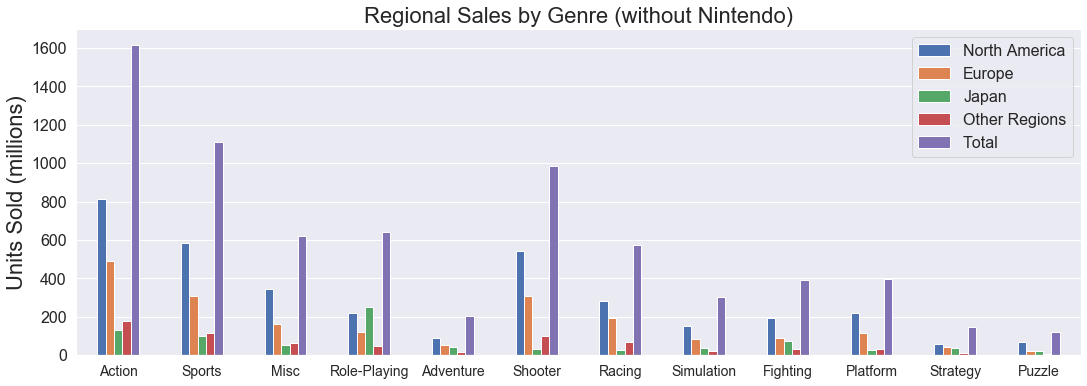

In [23]:
# Filter out the Nintendo-published games
no_nintendo = merged[merged.Publisher != 'Nintendo']

# Recalculate the totals
sales_by_genre = no_nintendo.groupby(by='Genre').sum()
sales_by_genre = sales_by_genre.reindex(genre_sort_idx)
sales_by_genre = sales_by_genre.loc[:,sales_list]

# Plot the data & format the plots
sales_by_genre.plot(kind='bar',figsize=(18,6))
ax = plt.gca()
ax.legend(labels=sales_label,loc='upper right',prop={'size':16})
ax.set_title('Regional Sales by Genre (without Nintendo)',fontsize=22)
ax.set_xlabel('',fontsize=22)
ax.set_ylabel('Units Sold (millions)',fontsize=22)
ax.tick_params(axis='x',which='major',labelsize=14,rotation=0)
ax.tick_params(axis='y',which='major',labelsize=16)
ax.grid(False,axis='x')

Now the sales of platformers are much more in line with what we'd expect given the number of games. It goes to show just how influential a company Nintendo has been. It also suggests that there is an appetite for these types of games, though so far no other publisher has been able to match Nintendo's success. Given that platformers are the 3rd smallest genre, it doesn't seem like many are interested in trying.

It's also worth noting that these are games <i>published</i> by Nintendo, not necessarily <i>developed</i> by them. Larger companies like Nintendo or Sony utilize in-house development teams, but they also partner with other companies. We could take a more granular look at the developers as well, but for now we'll move on to looking at the other popular category, shooters.

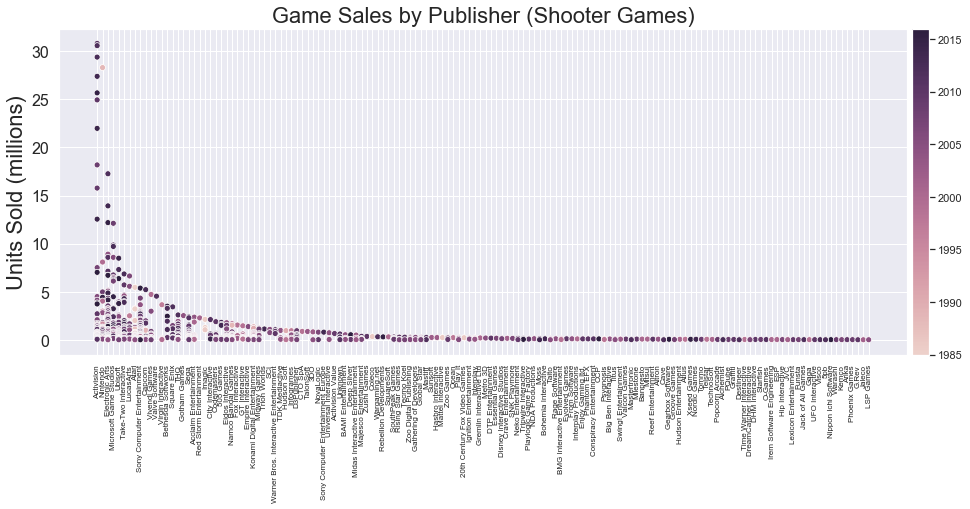

In [24]:
# Get the data for the shooters
Shooters = merged[merged.Genre == 'Shooter'].loc[:,['Year_of_Release','Publisher','Global_Sales']]
Shooters = Shooters.sort_values(by='Global_Sales',ascending=False)

# Plot the data & format the plots
fig = plt.figure(figsize=(18,6))
sns.scatterplot(data=Shooters,x='Publisher',y='Global_Sales',hue='Year_of_Release')
ax = plt.gca()
ax.legend().set_visible(False)
ax.set_title('Game Sales by Publisher (Shooter Games)',fontsize=22)
ax.set_xlabel('',fontsize=22)
ax.set_ylabel('Units Sold (millions)',fontsize=22)
ax.tick_params(axis='x',which='major',labelsize=8,rotation=90)
ax.tick_params(axis='y',which='major',labelsize=16)

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=sns.cubehelix_palette(8,as_cmap=True), norm=plt.Normalize(1985,2016))
cbar = fig.colorbar(sm,pad=0.005)

Here we see that many companies have had successful games in this category. Although not as dominant as Nintendo was with platformers, Activision clearly makes the best-selling shooters (the Call of Duty series). That said, Nintendo still managed to do pretty well and had a top selling game (Duck Hunt).

In [25]:
# Display the shooters that sold over 25 million units
display(merged[(merged.Genre == 'Shooter') & (merged.Global_Sales > 25)])

,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Name,,,,,,,,,,,,,,
Call of Duty: Black Ops,2010.0,Shooter,Activision,17.57,9.35,0.59,3.31,30.82,82.00,214.0,59.40,4340.0,Treyarch,M
Call of Duty: Black Ops 3,2015.0,Shooter,Activision,12.25,9.49,0.44,3.49,25.68,NaN,0.0,NaN,0.0,NaN,NaN
Call of Duty: Black Ops II,2012.0,Shooter,Activision,14.08,10.84,0.72,3.76,29.40,80.25,136.0,53.00,5041.0,Treyarch,M
Call of Duty: Ghosts,2013.0,Shooter,Activision,14.94,8.89,0.48,3.08,27.40,73.80,101.0,33.20,5684.0,Infinity Ward,M
Call of Duty: Modern Warfare 3,2011.0,Shooter,Activision,15.54,11.15,0.62,3.29,30.59,81.00,162.0,27.25,20053.0,"Infinity Ward, Sledgehammer Games",M
Duck Hunt,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,0.0,NaN,0.0,NaN,NaN


### How well do different platforms perform?

Now let's compare the game releases on different platforms.

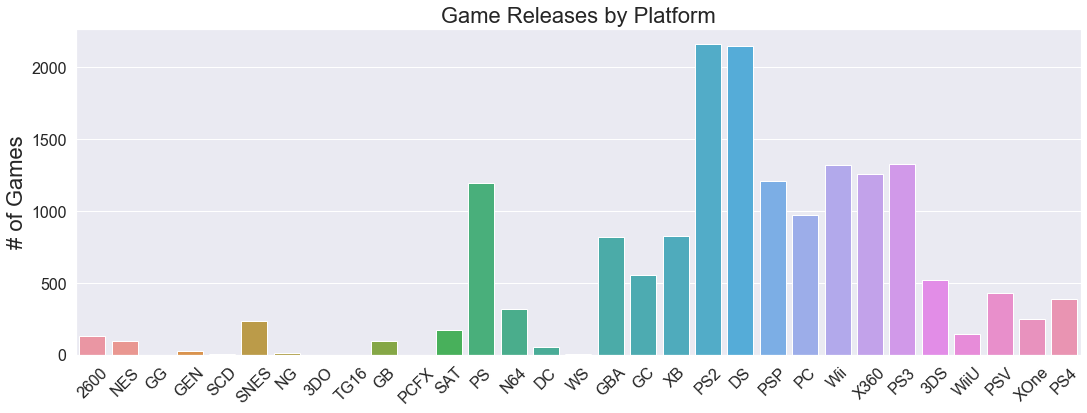

In [26]:
# Sort the platforms chronologically by average release year
avg_year = data[['Year_of_Release','Platform']].groupby(by='Platform').mean()
avg_year = avg_year.sort_values(by=['Year_of_Release'])
platform_sort_idx = avg_year.index

# Plot the data & format the plots
fig = plt.figure(figsize=(18,6))
sns.countplot(x='Platform',data=data,order=platform_sort_idx)
ax = plt.gca()
ax.set_title('Game Releases by Platform',fontsize=22)
ax.set_xlabel('',fontsize=22)
ax.set_ylabel('# of Games',fontsize=22)
ax.tick_params(axis='x',which='major',labelsize=16,rotation=45)
ax.tick_params(axis='y',which='major',labelsize=16)

Right off the bat we can see that the industry has grown massively over the years. The earlier systems on the left have barely any games compared to the more modern platforms, but we should also keep in mind that data may not be as readily available for the older systems. Note that the newest systems were actively getting games at the time of this data collection, so it makes sense that their bars have not yet reached their final height. The standout platforms are the Sony Playstation (PS) and its successor PS2, both of which had a massive library for their time, as did the Nintendo DS. Let's also look at the total sales like we did for the different genres.

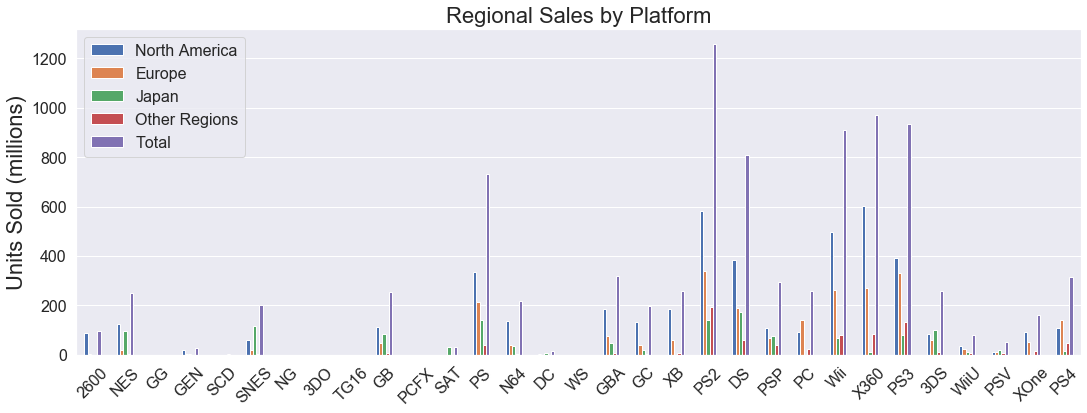

In [27]:
# Calculate the totals grouped by platform
sales_by_platform = data.groupby(by='Platform').sum()
sales_by_platform = sales_by_platform.reindex(platform_sort_idx)
sales_by_platform = sales_by_platform.loc[:,sales_list]

# Plot the data & format the plots
sales_by_platform.plot(kind='bar',figsize=(18,6))
ax = plt.gca()
ax.legend(labels=sales_label,loc='upper left',prop={'size':16})
ax.set_title('Regional Sales by Platform',fontsize=22)
ax.set_xlabel('',fontsize=22)
ax.set_ylabel('Units Sold (millions)',fontsize=22)
ax.tick_params(axis='x',which='major',labelsize=16,rotation=45)
ax.tick_params(axis='y',which='major',labelsize=16)
ax.grid(False,axis='x')

This matches what we'd expect given the library size for each platform. The NES and Gameboy games seemed to sell especially well, likely due to Nintendo's market dominance at the time (like we saw with Super Mario Bros. and Duck Hunt). These days there is a lot more competition.

### Console wars: Microsoft vs. Sony

The 3 big companies that make new platforms are Nintendo, Microsoft, & Sony. Every few years these companies release a new piece of hardware, usually at around the same time. These cycles are referred to as generations, with the current one being generation 8. For this analysis we'll stick to the most modern generations, 6-8, which starts around the year 2000. We'll also only focus on Microsoft and Sony home consoles as they compete more directly with each other than with Nintendo. That means we'll be looking at the Microsoft Xbox, 360, & One (XB, X360, XOne) vs. the Sony Playstation 2-4 (PS2, PS3, PS4). Let's see how well the games sold.

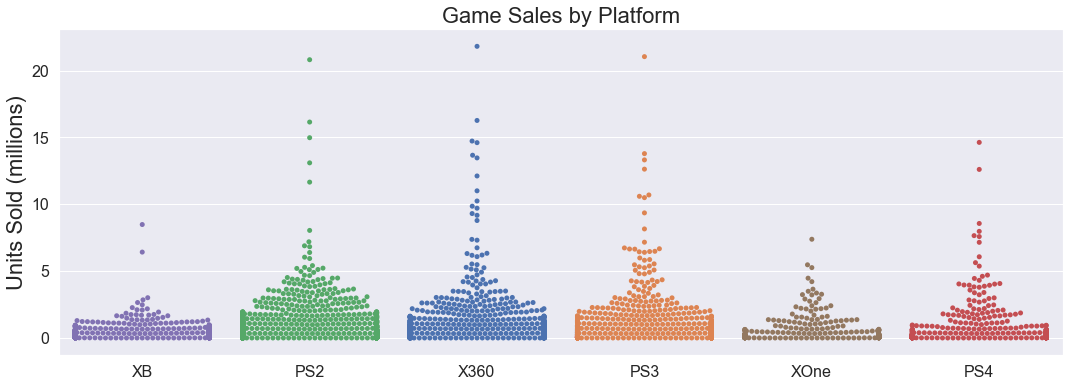

In [28]:
# Select out the current generations of consoles
gen6 = ['XB','PS2']
gen7 = ['X360','PS3']
gen8 = ['XOne','PS4']
gen_list = [gen6,gen7,gen8]
recent_consoles = gen6+gen7+gen8
recent_data = data[data.Platform.isin(recent_consoles)]

# Plot the data as a swarm plot & format the plots
fig = plt.figure(figsize=(18,6))
sns.swarmplot(data=recent_data,x='Platform',y='Global_Sales',hue='Platform',order=recent_consoles)
ax = plt.gca()
ax.legend().set_visible(False)
ax.set_title('Game Sales by Platform',fontsize=22)
ax.set_xlabel('',fontsize=22)
ax.set_ylabel('Units Sold (millions)',fontsize=22)
ax.tick_params(axis='x',which='major',labelsize=16)
ax.tick_params(axis='y',which='major',labelsize=16)

It certainly looks like games sold better on the PS2 and PS4 than on the Xbox or Xbox One, respectively. But generation 7 might actually favor the Xbox 360. What do the total sales look like?

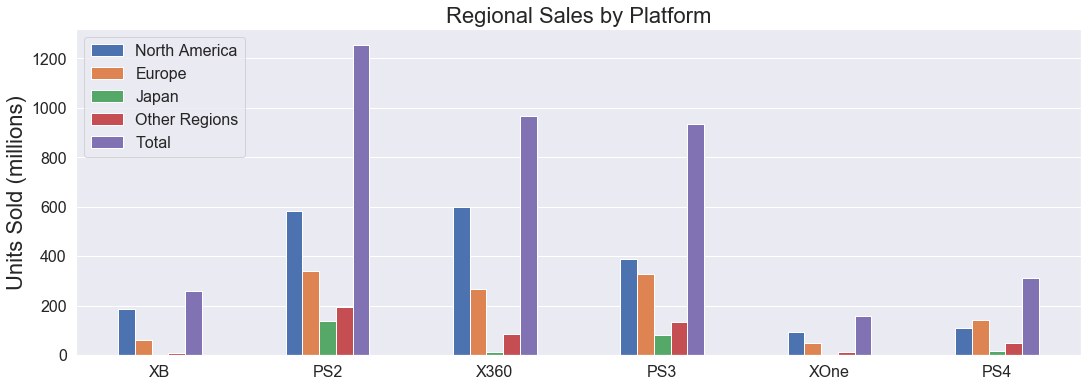

In [29]:
# Calculate the totals grouped by platform
sales_by_platform = recent_data.groupby(by='Platform').sum()
sales_by_platform = sales_by_platform.reindex(platform_sort_idx)
sales_by_platform = sales_by_platform.loc[recent_consoles,sales_list]

# Plot the totals & format the plots
sales_by_platform.plot(kind='bar',figsize=(18,6))
ax = plt.gca()
ax.legend(labels=sales_label,loc='upper left',prop={'size':16})
ax.set_title('Regional Sales by Platform',fontsize=22)
ax.set_xlabel('',fontsize=22)
ax.set_ylabel('Units Sold (millions)',fontsize=22)
ax.tick_params(axis='x',which='major',labelsize=16,rotation=0)
ax.tick_params(axis='y',which='major',labelsize=16)
ax.grid(False,axis='x')

With this data it's pretty clear that the PS2 outdid the Xbox and so far the PS4 is outdoing the Xbox One. But generation 7 is harder to call. Most regions preferred Sony, but North America drove up the Xbox 360 game sales enough to overtake the PS3 worldwide. Microsoft is an American company, so it would make sense that they were able to establish more of a market there (whereas Sony is Japanese). But it's hard to say that either company 'won' the console war that generation.

Another way we can compare the two is by focusing only on cross-platform games. These are games that are released on multiple different systems, often simultaneously. Since Microsoft and Sony use such similar hardware, this is pretty common. We can compare sales performance of the <i>same game</i> between the two systems. If we make a line plot connecting the sales data for individual games, we can use the slopes to estimate if sales were better on one platform or another.

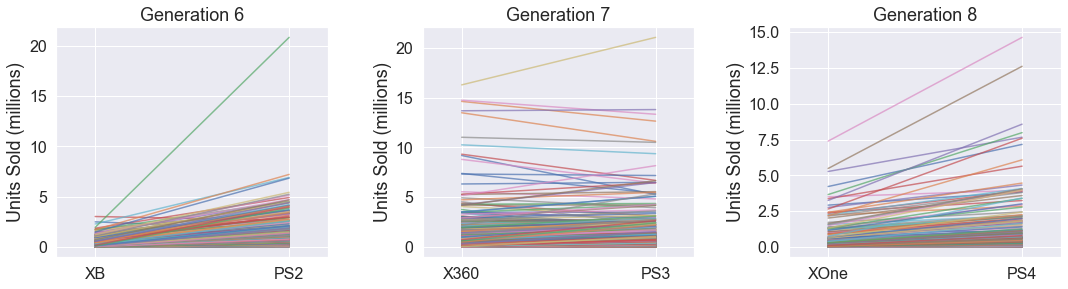

In [30]:
# Select out games that were released on more than one platform
release_counts = recent_data['Name'].value_counts()
crossplatform = release_counts[recent_data['Name'].value_counts() > 1].index
crossplatform = recent_data[recent_data.Name.isin(crossplatform)].copy()

# Set up the plots
fig,ax = plt.subplots(1,3,figsize=(18,4))

# Loop through the different generations
pivoted_list = []
for ax_col in range(3):
    
    # Slice out the relevant consoles and columns
    gen_sel = gen_list[ax_col]
    pivoted = crossplatform.loc[crossplatform.Platform.isin(gen_sel),
                                ['Name','Platform','Year_of_Release','Genre','Global_Sales']]
    pivoted = pivoted.pivot(index='Name',columns='Platform',values='Global_Sales')

    # Drop entries that are missing sales data for one or both of the two platforms
    pivoted = pivoted.drop(pivoted[pivoted.transpose().isnull().any()].index)

    # Calculate the difference in sales between Sony and Microsoft
    pivoted['dif'] = pivoted[gen_sel[1]] - pivoted[gen_sel[0]]
    pivoted = pivoted.sort_values(by='dif')
    pivoted_list.append(pivoted)
    
    # Plot the data & format the plots
    line_data = pd.DataFrame([pivoted[gen_sel[0]],pivoted[gen_sel[1]]])
    line_data.plot(ax=ax[ax_col],kind='line',alpha=0.7)
    ax[ax_col].legend().set_visible(False)
    ax[ax_col].set_xticks([0,1])
    ax[ax_col].set_xlim([-0.2,1.2])
    ax[ax_col].set_xticklabels(gen_sel,fontsize=16)
    ax[ax_col].set_title(format('Generation %d' % (ax_col+6)),fontsize=18)
    ax[ax_col].set_ylabel('Units Sold (millions)',fontsize=18)
    ax[ax_col].tick_params(axis='x',which='major',labelsize=16)
    ax[ax_col].tick_params(axis='y',which='major',labelsize=16)
    
# Adjust the subplot spacing
plt.subplots_adjust(left=.125,bottom=.1,right=.9,top=.9,wspace=.35,hspace=.2)

These plots appear to match the sales data for all games. Generations 6 & 8 show a preference for Sony (e.g. positive slopes) but generation 7 is mixed. A visualization like this is a good way to get a sense of the data, but it's difficult to see everything with so many data points. Instead we can calculate the difference for each game between its Sony and its Microsoft sales. Plotting the cumulative distribution of these <code>dif</code> values will tell us how skewed sales for cross-platform games are towards one system or another.

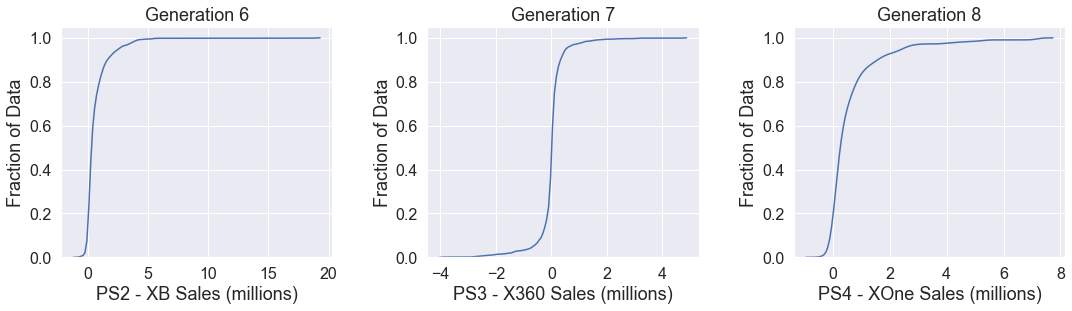

In [31]:
# Set up the plots
fig,ax = plt.subplots(1,3,figsize=(18,4))

# Loop through the different generations
for ax_col in range(3):

    # Select the relevant data
    gen_sel = gen_list[ax_col]
    pivoted = pivoted_list[ax_col]

    # Plot the data & format the plots
    sns.distplot(pivoted.dif,hist=False,kde_kws=dict(cumulative=True),ax=ax[ax_col])
#     sns.kdeplot(pivoted.dif,cumulative=True,ax=ax[ax_col])
    ax[ax_col].set_title(format('Generation %d' % (ax_col+6)),fontsize=18)
    ax[ax_col].set_xlabel(gen_sel[1] + ' - ' + gen_sel[0] + ' Sales (millions)',fontsize=18)
    ax[ax_col].set_ylabel('Fraction of Data',fontsize=18)
    ax[ax_col].tick_params(axis='x',which='major',labelsize=16)
    ax[ax_col].tick_params(axis='y',which='major',labelsize=16)
    
# Adjust the subplot spacing
plt.subplots_adjust(left=.125,bottom=.1,right=.9,top=.9,wspace=.35,hspace=.2)

As expected, almost all of the generation 6 and 8 games were biased towards Sony. This is much easier to see with the cumulative distribution than with all of the individual sales plotted. But generation 7 still looks like a tie. In the next section we'll use some statistics to quantify these differences and see whether that's actually the case.

<a name = "stats"></a>
<hr>

# Statistical Analysis of the Console Wars
[back to top](#top)

First let's do a linear regression of the cross-platform sales between each pair of systems. You'd expect a good game to sell well regardless of platform, so we should get a positive correlation.

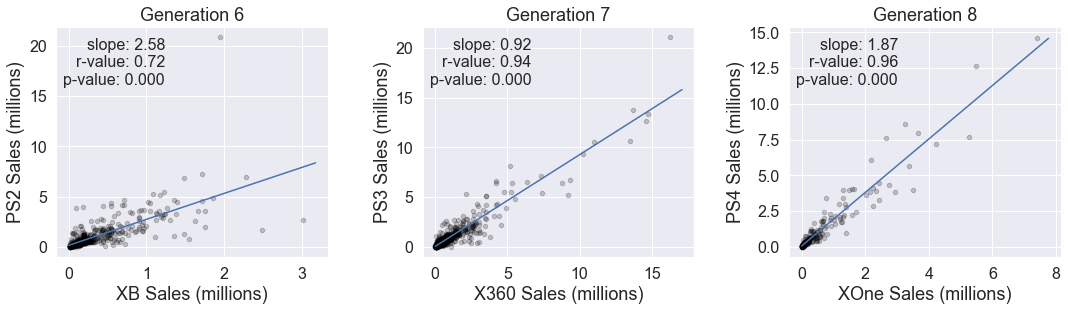

In [32]:
# Set up the plots
fig,ax = plt.subplots(1,3,figsize=(18,4))

# Loop through the different generations
for ax_col in range(3):

    # Select the relevant data
    gen_sel = gen_list[ax_col]
    pivoted = pivoted_list[ax_col]
    
    # Calculate the linear regression
    slope,intercept,r_value,p_value,std_err = scipy.stats.linregress(pivoted[gen_sel[0]],pivoted[gen_sel[1]])
    
    # Plot the data
    pivoted.plot(ax=ax[ax_col],kind='scatter',x=gen_sel[0],y=gen_sel[1],c='black',alpha=0.2)
    
    # Also plot the regression line
    xmax = ax[ax_col].get_xlim()
    xmax = xmax[1]
    plt.sca(ax[ax_col])
    plt.plot([0,xmax],[intercept,slope*xmax+intercept])
    
    # Format the plots
    ax[ax_col].set_title(format('Generation %d' % (ax_col+6)),fontsize=18)
    ax[ax_col].set_xlabel(gen_sel[0] + ' Sales (millions)',fontsize=18)
    ax[ax_col].set_ylabel(gen_sel[1] + ' Sales (millions)',fontsize=18)
    ax[ax_col].tick_params(axis='x',which='major',labelsize=16)
    ax[ax_col].tick_params(axis='y',which='major',labelsize=16)
    ax[ax_col].text(.4,.75,format('slope: %.2f\nr-value: %.2f\np-value: %.3f' % (slope,r_value,p_value)),
                    transform=ax[ax_col].transAxes,fontsize=16,ha='right')
    
# Adjust the subplot spacing
plt.subplots_adjust(left=.125,bottom=.1,right=.9,top=.9,wspace=.35,hspace=.2)

The regression shows a positive linear relationship between the two variables. If a game sells well on one platform, it will sell well on the other. For generation 6, the slope of our regression predicts a cross-platform game to sell 2.58 copies on the PS2 for every 1 on the Xbox. We see a slope less than one for generation 7, meaning the Xbox 360 had a slight advantage for cross-platform games. It's a small difference, so it's hard to say whether generation 7 should go to Microsoft or be a tie. We can get an estimate for how significant this difference is with bootstrapping.

1. We'll calculate the mean of the <code>dif</code> values to use as our test statistic. This is the value we'll estimate with bootstrapping.
2. We want to test the hypothesis that one company outsold the other. So our null hypothesis should be that there is no difference between the two, i.e. that our test statistic equals 0.
3. We can resample from our <code>dif</code> values (with replacement) to get a new estimate for the mean.
4. If we repeat this process thousands of times, we'll have a distribution of estimates for the mean.
5. Next we shift that distribution to be centered at 0. This gives us what we'd expect to find under our null hypothesis.
6. Finally we see how our observed mean compares against this distribution. How likely are we to have gotten a value like this under the null hypothesis?

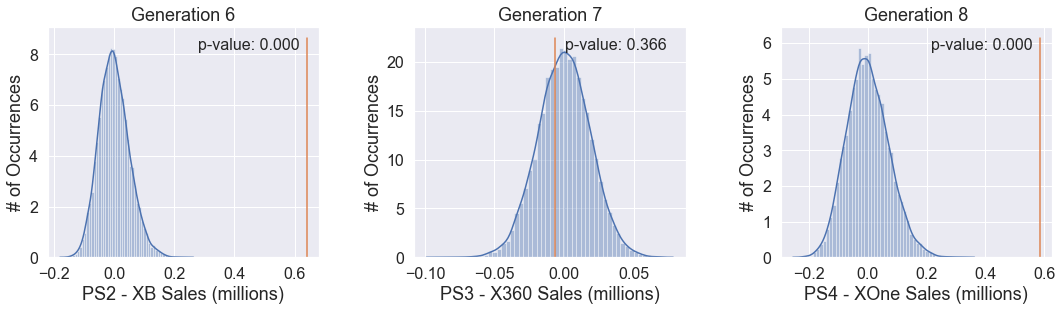

In [33]:
# Set up the plots
fig,ax = plt.subplots(1,3,figsize=(18,4))

# Loop through the different generations
for ax_col in range(3):
    
    # Select the relevant data
    gen_sel = gen_list[ax_col]
    pivoted = pivoted_list[ax_col]

    # Calculate the observed mean
    true_mean = pivoted.dif.mean()
    
    # Estimate the mean with bootstrapping
    rep_list = []
    for rep in range(10000):    
        rep_dif = np.array(pivoted.dif.sample(frac=1,replace=True))
        rep_mean = rep_dif.mean()
        rep_list.append(rep_mean)

    # Center the estimated distribution at 0 (i.e. no difference between the two companies, our null hypothesis)
    rep_list = rep_list - np.mean(rep_list)

    # Calculate the probability of getting a mean this extreme under the null hypothesis
    bs_p = sum(rep_list > true_mean)/len(rep_list)
    # Adjust p-value to switch tails if the true_mean is negative
    if bs_p > 0.5:
        bs_p = 1-bs_p
    
    # Plot the data
    sns.distplot(rep_list,ax=ax[ax_col])
    
    # Also plot the observed value
    ymax = ax[ax_col].get_ylim()
    ymax = ymax[1]
    plt.sca(ax[ax_col])
    plt.plot([true_mean,true_mean],[0,ymax])
    
    # Format the plots
    ax[ax_col].set_title(format('Generation %d' % (ax_col+6)),fontsize=18)
    ax[ax_col].set_xlabel(gen_sel[1] + ' - ' + gen_sel[0] + ' Sales (millions)',fontsize=18)
    ax[ax_col].set_ylabel('# of Occurrences',fontsize=18)
    ax[ax_col].tick_params(axis='x',which='major',labelsize=16)
    ax[ax_col].tick_params(axis='y',which='major',labelsize=16)
    ax[ax_col].text(.93,.9,format('p-value: %.3f' % bs_p),transform=ax[ax_col].transAxes,fontsize=16,ha='right')
    
# Adjust the subplot spacing
plt.subplots_adjust(left=.125,bottom=.1,right=.9,top=.9,wspace=.35,hspace=.2)

Based on these results, we should accept the null hypothesis that generation 7 was a tie. Meanwhile the observed mean for generations 6 and 8 (the orange vertical line) is nearly impossible under our null hypothesis. All of our previous results showed Sony easily winning those generations, so that's not surprising.

Another way we could have looked at this data is with a paired t-test or Wilcoxon signed-rank test. However, the cumulative distributions of the <code>dif</code> values we plotted earlier show that 2 of our generations are heavily skewed, which goes against the assumptions of those tests. In general, bootstrapping provides a more flexible solution, though it can be more computationally expensive. That said, since our effect size is so significant, the t-test should produce similar results, and indeed we can see that it does.

In [34]:
# Loop through the generations to calculate and print out the paired t-test results
print('Paired T-test')
for ax_col in range(3):
    gen_sel = gen_list[ax_col]
    pivoted = pivoted_list[ax_col]
    ttest_t,ttest_p = scipy.stats.ttest_rel(pivoted[gen_sel[0]],pivoted[gen_sel[1]])
    # Adjust p-value to switch tails like we did with the bootstrap
    if ttest_p > 0.5:
        ttest_p = 1-ttest_p
    print('Generation %d p-value: %.3f' % (ax_col+6,ttest_p))

Paired T-test
Generation 6 p-value: 0.000
Generation 7 p-value: 0.268
Generation 8 p-value: 0.000


<a name = "conclusion"></a>
<hr>

## Conclusion
[back to top](#top)

Even with just some basic analysis, we were able to do a lot with this dataset. Comparing sales trends across genres and platforms led to many useful insights. We learned that the role-playing game market is uniquely biased towards Japan, so making a game in that genre targeted mainly at western audiences would likely undercut its potential success. Platformers and shooters seem to have more sales potential than other categories, and if I were a game studio I'd stay away from adventure games.

Diving deeper into statistical methods with regression and bootstrapping, we saw that Sony had a huge advantage in game sales during the PS2 and PS4 generations. Microsoft was able to reach parity with the Xbox 360, largely thanks to North America. Hardware and software sales end up in a virtuous cycle, as developers want to make games for systems that people already own, and gamers want the systems that can play their favorite games. This means that if one company gets an early foothold it can be difficult to catch up. But it also means that each generation is a new opportunity to make a comeback, as Microsoft did in generation 7.

There is much more we could do to extend this analysis, but we'll leave it here for now. One idea would be to dig up data on hardware sales, as we only focused on the games here and not the systems themselves. We could look at how trends in gaming compare with trends in other media, like genre popularity over time in games vs. movies. And we can't forget mobile gaming, a relatively new but popular option for people. Moving forward, we should expect that platform to have more and more of a significant impact on industry trends.